In [7]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
#loading my dataframe
df= pd.read_csv(r"C:\Users\USER\Desktop\Projects\Forest\data\personality_datasert.csv")
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
df.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [6]:
#Encode Categorical Columns

# Target column encoding
df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

# Encode other binary columns like 'Stage_fear', 'Drained_after_socializing'
binary_map = {'Yes': 1, 'No': 0}

df['Stage_fear'] = df['Stage_fear'].map(binary_map)
df['Drained_after_socializing'] = df['Drained_after_socializing'].map(binary_map)


In [8]:
#Step 6: Define Features and Target
x = df.drop('Personality', axis=1)
y = df['Personality']


In [10]:
#Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [11]:
#RandoForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predict
y_pred_rf = rf_model.predict(x_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Feature Importance
importances_rf = rf_model.feature_importances_


Random Forest Accuracy: 0.9224137931034483
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       278
           1       0.94      0.91      0.92       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580

Confusion Matrix:
 [[259  19]
 [ 26 276]]


In [ ]:
# AdaBoostClassifier
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_model.fit(x_train, y_train)

# Predict
y_pred_ab = ab_model.predict(x_test)

# Evaluate
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ab))
print(classification_report(y_test, y_pred_ab))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ab))

# Feature Importance
importances_ab = ab_model.feature_importances_


AdaBoost Accuracy: 0.9189655172413793
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       278
           1       0.92      0.92      0.92       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580

Confusion Matrix:
 [[255  23]
 [ 24 278]]


In [22]:
#GradientBoostClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)

# Predict
y_pred_gb = gb_model.predict(x_test)

# Evaluate
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

# Feature Importance
importances_gb = gb_model.feature_importances_


Gradient Boosting Accuracy: 0.9293103448275862
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580

Confusion Matrix:
 [[261  17]
 [ 24 278]]


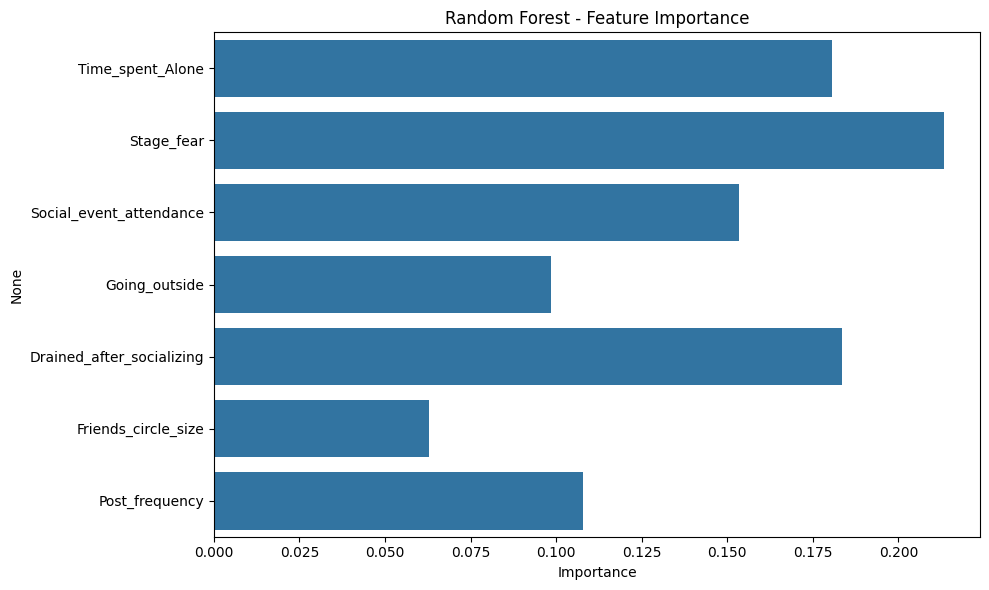

In [24]:
# plotting the RandomFoerst feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf, y=x.columns)
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


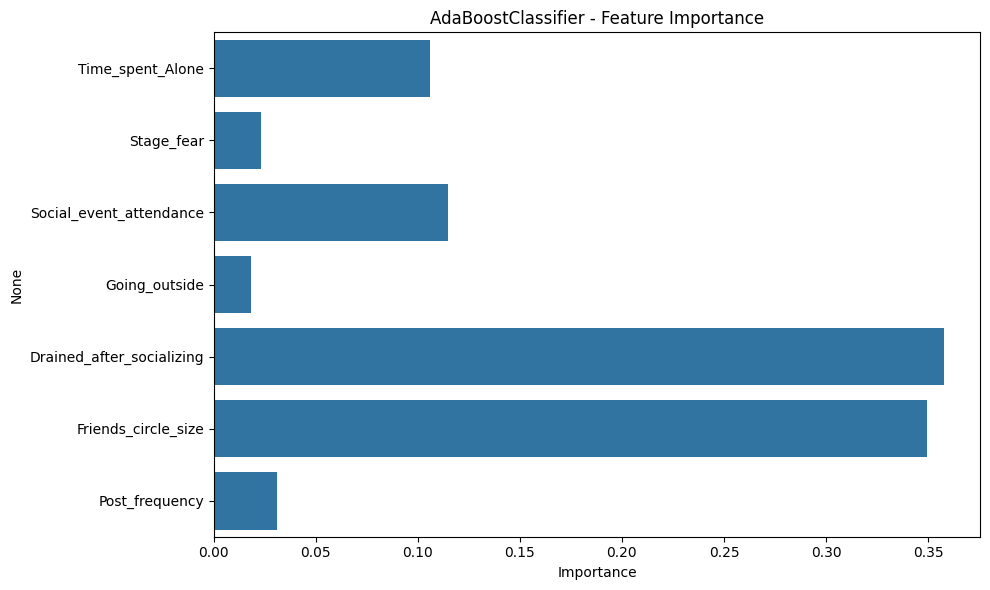

In [23]:
# plotting the AdaBoostClassifier feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_ab, y=x.columns)
plt.title("AdaBoostClassifier - Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

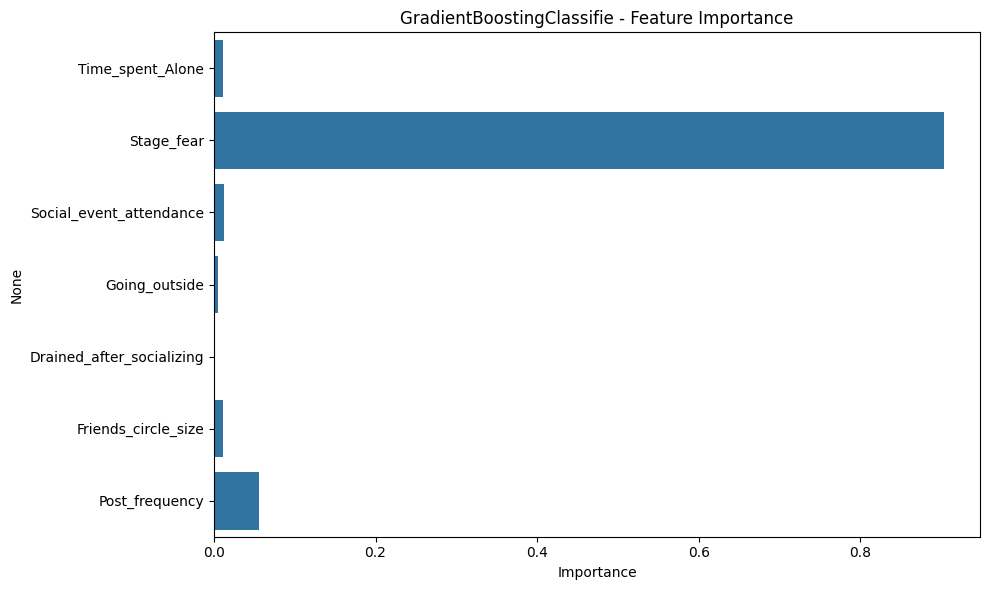

In [25]:
# plotting the GradientBoostingClassifier feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_gb, y=x.columns)
plt.title("GradientBoostingClassifie - Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()